# Gradient Boost  Regression

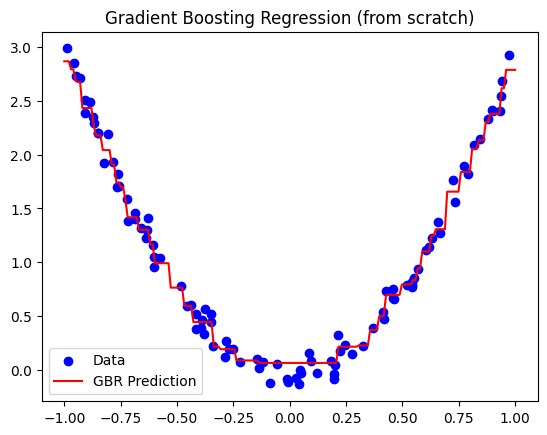

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# --- Gradient Boosting Regressor from scratch ---
class GradientBoostingRegressorScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        # Convert to numpy arrays
        X, y = np.array(X), np.array(y)
        
        # Step 1: initialize model with mean of y
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)
        
        for i in range(self.n_estimators):
            # Step 2: compute residuals
            residuals = y - y_pred

            # Step 3: fit weak learner to residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            
            # Step 4: predict and update
            update = tree.predict(X)
            y_pred += self.learning_rate * update

            # Save tree
            self.models.append(tree)

    def predict(self, X):
        X = np.array(X)
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


# --- Demo using synthetic data ---
if __name__ == "__main__":
    # Create sample data
    np.random.seed(42)
    X = np.random.rand(100, 1) * 2 - 1
    y = 3 * X[:, 0]**2 + np.random.randn(100) * 0.1

    # Train gradient boosting regressor
    gbr = GradientBoostingRegressorScratch(n_estimators=50, learning_rate=0.1, max_depth=2)
    gbr.fit(X, y)

    # Predictions
    X_test = np.linspace(-1, 1, 200).reshape(-1, 1)
    y_pred = gbr.predict(X_test)

    # Plot
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X_test, y_pred, color='red', label='GBR Prediction')
    plt.title("Gradient Boosting Regression (from scratch)")
    plt.legend()
    plt.show()
